In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
events = [i for i in dir(cv2) if 'EVENT' in i]
events

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']

(500, 500, 3)


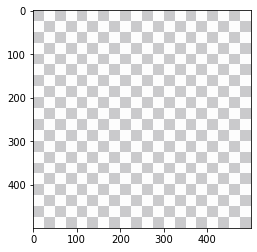

In [3]:
image_path = "/home/dave/umass/internship/test/images/transp.png"
transp = cv2.imread(image_path)
# img = cv2.resize(img,(300,300))
print(transp.shape)
plt.imshow(transp[...,::-1])

In [4]:
import cv2
import numpy as np

drawing = False # true if mouse is pressed
mode = False # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode,transp,alpha,height,width

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(transp,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.line(transp,(ix,iy),(x,y),(0,0,255),5)
                ix = x
                iy = y


    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(transp,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.line(transp,(ix,iy),(x,y),(0,0,255),5)
            
    elif event == cv2.EVENT_MBUTTONDBLCLK:
#         drawing = False
#         img = cap.read()
        
        transp = np.zeros((height,width,3))
        alpha = np.zeros((height,width,3))


            
# Create a black image, a window and bind the function to window
# cv2.setMouseCallback('test3',draw_circle)

cap = cv2.VideoCapture(-1)
ret, img = cap.read()
if ret:
    height = img.shape[0]
    width = img.shape[1]
transp = np.zeros((height,width,3))
alpha = np.zeros((height,width,3))

while(1):
    cv2.namedWindow('test3')
    cv2.setMouseCallback('test3',draw_circle)
    ret, img = cap.read()
    if ret:
        alpha[transp>0] = 1
        final = img * (1-alpha) + transp*alpha
        cv2.imshow('test3',final/255)
        if cv2.waitKey(20) & 0xFF == 27:
            break
cv2.destroyAllWindows()

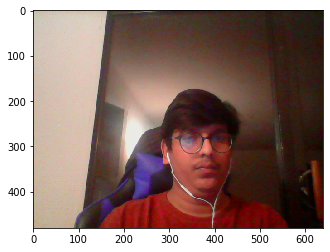